# Hypertension Classification
This notebook builds and evaluates a deep learning model to predict hypertension using various lifestyle and health-related features.

## 1.  Imports
We begin by importing necessary libraries for data handling, visualization, preprocessing, and modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## 2.  Load Dataset

In [2]:
df = pd.read_csv("hypertension_dataset.csv")
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


## 3.  Data Overview
Check basic info and missing values.

In [3]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB
None
Age                   0
Salt_Intake           0
Stress_Score          0
BP_History            0
Sleep_Duration        0
BMI                   0
Medication          799
Family_History        0
Exercise_Level       

## 4.  Encode Categorical Features

In [4]:
cat_features = ['BP_History', 'Medication', 'Family_History', 'Exercise_Level', 'Smoking_Status']
le = LabelEncoder()
for col in cat_features:
    df[col] = le.fit_transform(df[col])

df['Has_Hypertension'] = df['Has_Hypertension'].map({'Yes': 1, 'No': 0})

## 5.  Correlation Heatmap

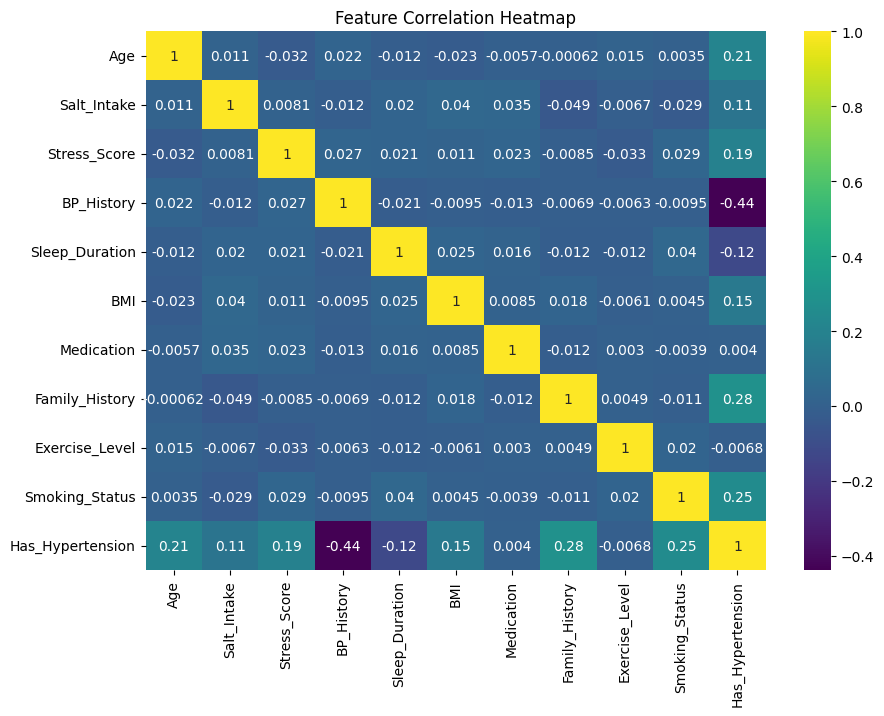

In [5]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Feature Correlation Heatmap')
plt.show()

## 6.  Prepare Features and Labels

In [6]:
X = df.drop('Has_Hypertension', axis=1)
y = df['Has_Hypertension']

## 7.  Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 8.  Standardize Features

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 9.  Build Neural Network Model

In [9]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\LENOVO\hypertenstion\notebook\env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 10.  Train the Model

In [10]:
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, callbacks=[es])

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5323 - loss: 0.7012 - val_accuracy: 0.8176 - val_loss: 0.5303
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7508 - loss: 0.5305 - val_accuracy: 0.8491 - val_loss: 0.3813
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7979 - loss: 0.4367 - val_accuracy: 0.8553 - val_loss: 0.3297
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8253 - loss: 0.3751 - val_accuracy: 0.8616 - val_loss: 0.3062
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8338 - loss: 0.3743 - val_accuracy: 0.8711 - val_loss: 0.2953
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8439 - loss: 0.3340 - val_accuracy: 0.8836 - val_loss: 0.2762
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8376 - loss: 0.3544 - val_accuracy: 0.8805 - val_loss: 0.2722
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8544 - loss: 0.3077 - val_accuracy: 0.8868 - val_loss:

## 11.  Evaluate Performance

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8776 - loss: 0.2719 
Test Accuracy: 0.89


## 12.  Predictions

In [12]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


## 13.  Metrics & Confusion Matrix

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       191
           1       0.91      0.87      0.89       206

    accuracy                           0.89       397
   macro avg       0.89      0.89      0.89       397
weighted avg       0.89      0.89      0.89       397



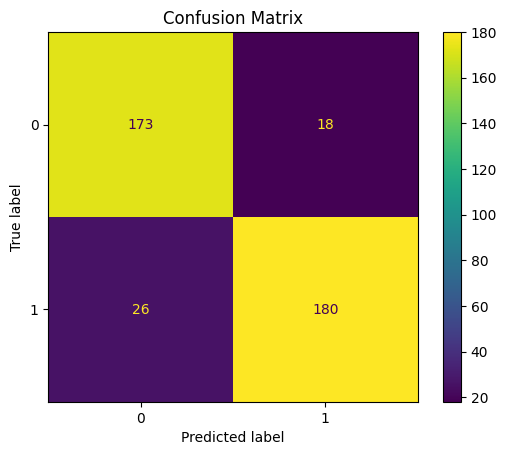

In [13]:
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

## 14.  Training History

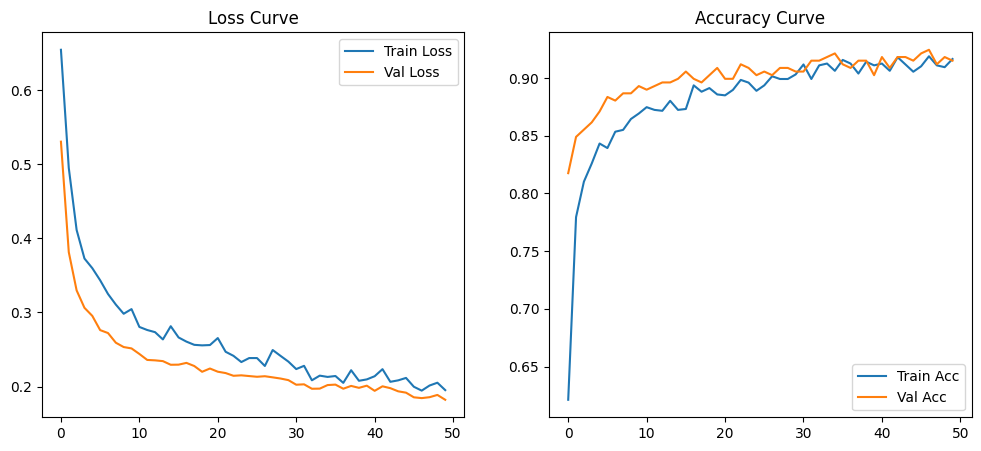

In [14]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

## 15.  Save the Model

In [15]:
# save the model
import pickle
pickle.dump(model, open("hypertension.pkl", "wb"))

In [16]:
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)